# 2) Logistic regression. Using the data provided (Logistic_regression_ls.csv), plot the decision boundary (linear) using Optimization of the sigmoid function.

In [97]:
# importing the libraries.
import numpy as np
import matplotlib.pyplot as plt
import math as m
import random


def sigmoid(z):       # defining the sugmoid function .
    val = 1/(1 + np.exp(-z))
    return val



def cost_function(w, X, y):    # defining the cost function i.e. cross entropy function.
    r, c = np.shape(X)          # where w is the vector with the parameters, and X, y are the training data.
    theta = np.zeros(r)
    error = 0
    for i in range(r):
        if(y[i] == 1):
            val1 = sigmoid(np.dot(w, X[i]))
            val1 = np.log(val1)
            error += val1
        else:
            val2 = sigmoid(np.dot(w, X[i]))
            val2 = np.log(1- val2)
            error += val2
        
    error = -(error/r)
    return error             # returning cost value.


def bracketing_method_alpha(w_start, X, y, direction, a, b, n):  # defining this function to
    d_alpha = (b - a)/n                                           # find out the interval in which optimal learning rate exist.
    w1 = a
    w2 = w1 + d_alpha
    w3 = w2 + d_alpha
    while(w3 <= b):
        x1 = w_start + w1*direction
        y1 = w_start + w2*direction
        z1 = w_start + w3*direction
        if((cost_function(x1, X, y) >= cost_function(y1, X, y)) and (cost_function(y1, X, y) <= cost_function(z1, X, y))):
            return w1, w3
        else:
            w1 = w2
            w2 = w3
            w3 = w3 + d_alpha
    if(cost_function((w_start + a*direction), X, y) > cost_function((w_start + b*direction), X, y)):
        return (b - d_alpha), b
    else:
        return a, (a + d_alpha)     # returning the sub-interval.
    

def Region_elimination_alpha(w_start, X, y, direction, a, b):
    L = b - a                                     # using region elimination method to compute the optimal learing rate.
    eps = 10e-5
    w_m = (a+b)/2
    while(L > eps):
        w_1 = a + L/4
        w_2 = b - L/4
        x1 = w_start + w_1*direction
        y1 = w_start + w_m*direction
        z1 = w_start + w_2*direction
        if(cost_function(x1, X, y) < cost_function(y1, X, y)):
            b = w_m
            w_m = w_1
        elif(cost_function(z1, X, y) < cost_function(y1, X, y)):
            a = w_m
            w_m = w_2
        else:
            a = w_1
            b = w_2   
        L = b - a
    return a          # returning the optimal learing rate i.e. alpha.
        

def Unidirectional(w_start , X, y, direction, n):   # defining this method to compute optimal learing rate.
    alpha_1 = 0
    alpha_2 = 5
    interval = bracketing_method_alpha(w_start, X, y, direction, alpha_1, alpha_2, n)  
                    # using brackting method to find out the interval in which optimal learing rate exist.
    pt = Region_elimination_alpha(w_start, X, y, direction, interval[0], interval[1])
                    # using region elimination method to compute the optimal learing rate.
    return pt
    


def fullGradient(w, X, y):   # defining the full gradient function . It computes the gradiient at the point w.
    r, c = np.shape(X)        # where w is the vector with the parameters, and X, y are the training data.
    grad = np.zeros(c)
    for i in range(r):
        grad += (sigmoid(np.dot(w, X[i])) - y[i])*X[i]
    
    grad = grad/r
    return grad        # returning the gredient at the point w.



def Gradient_descent_alpha(X, y):   # defining the Gradient_descent_alpha function to obtain optimal weight vector.
    r, c = np.shape(X)                 
    eps = 10e-5 
    
    iteration = 1
    iterates = []
    f = []
    w = np.ones(c)               # initial guess for parameter vector is the vector whose components are one.
    iterates.append(w)           # iterates is a list which will store the updated parameters at each iterations.
    grad = fullGradient(w, X, y)                            # by the gradient descent method.
        
    while((np.linalg.norm(w) > eps) and (iteration < 500)):   
        print(f'At {iteration}-th interation, the value of W is {w}')
        loss1 = cost_function(w, X, y)  # calculating the cost using the cost function at each iteration.
        f.append(loss1)                 # And also store in a list which is named as f.
            
        direction = -grad
        alpha = Unidirectional(w, X, y, direction, 50) # computing learing rate by unidirectional method.
        w = w + (alpha*direction)      # iteration method : w(k+1) = w(k) + rho*direction. 
        iterates.append(w)             # where direction is steepest descent/gradient direction.
        iteration += 1
        grad = fullGradient(w, X, y)       # computing the gradient by full gradient method.
            
    
    f = np.array(f).reshape((len(f), 1))
    return w, f                # returning the optimal parameter vector and array of costs computed at each iterations.


def Gradient_descent_alpha_fixed(X, y):   # defining the Gradient_descent_alpha function to obtain optimal weight vector.
    r, c = np.shape(X)                 
    eps = 10e-5  
    
    iteration = 1
    iterates = []
    f = []
    w = np.ones(c)               # initial guess for parameter vector is the vector whose components are one.
    iterates.append(w)           # iterates is a list which will store the updated parameters at each iterations.
    grad = fullGradient(w, X, y)                            # by the gradient descent method.
        
    while((np.linalg.norm(w) > eps) and (iteration < 500)):   
        print(f'At {iteration}-th interation, the value of W is {w}')
        loss1 = cost_function(w, X, y)  # calculating the cost using the cost function at each iteration.
        f.append(loss1)                 # And also store in a list which is named as f.
            
        direction = -grad
        alpha = 0.01                   # learing rate is fixed.
        w = w + (alpha*direction)      # iteration method : w(k+1) = w(k) + rho*direction. 
        iterates.append(w)             # where direction is steepest descent/gradient direction.
        iteration += 1
        grad = fullGradient(w, X, y)       # computing the gradient by full gradient method.
            
    
    f = np.array(f).reshape((len(f), 1))
    return w, f                # returning the optimal parameter vector and array of costs computed at each iterations.



def compare(w1, w2, X_test, y_test):     # defining the compare function . where w1 and w2 are optimal parameter vectors
                        # computed using gradient decent with fixed learing rate and unidirectional algorithm respectively.
    r, c = np.shape(X_test)
    y_test_pred1 = np.zeros(r, dtype = int)
    probability1 = np.zeros(r)
    
    for i in range(r):         # computing the probabilities using w1 vector and predicts labels also.
        val1 = sigmoid(np.dot(w1, X_test[i]))   
        probability1[i] = val1
        if(val1 > 0.5):
            y_test_pred1[i] = 1

    y_test_pred_list1 = list(y_test_pred1)
    
    y_test1 = y_test.reshape(len(y_test))
    y_test1_list = list(y_test1)
    
    count1 = 0              # counting the misclassified days using full gradient descent method.
    for i in range(r):   
        if(y_test1_list[i] != y_test_pred_list1[i]):
            count1 += 1
            
    print(f'The no. of misclassified samples by gradient descent method with fixed learning rate is: {count1}')
    
    
    
    y_test_pred2 = np.zeros(r, dtype = int)
    probability2 = np.zeros(r)
    
    for i in range(r):           # computing the probabilities using w1 vector and predicts labels also.
        val2 = sigmoid(np.dot(w2, X_test[i]))
        probability2[i] = val2
        if(val2 > 0.5):
            y_test_pred2[i] = 1

            
    y_test_pred_list2 = list(y_test_pred2)
    
    count2 = 0            # counting the misclassified days using stochastic gradient descent method.
    for i in range(r):
        if(y_test1_list[i] != y_test_pred_list2[i]):
            count2 += 1
    
    print(f'The no. of misclassified samples by gradient descent method using unidirectional algorithm is: {count2}')
    
    
    
    merged_arrays = zip(y_test1, probability1, y_test_pred_list1, probability2, y_test_pred_list2)
 
    # pandas Dataframe. Using it reates a table that contains for each test
    #point the probabilies and classifiers of both optimization methods, and the
    #actual direction from the test set. 
    
    df = pd.DataFrame(merged_arrays, columns=['Ground Truth', 'GD_fi_al prob.', 'prediction', 'GD_uni Prob.', 'prediction'])
    
    # Print data.
    print(df[0:60])
    print(df[60: 120])
    print(df[120: 180])
    print(df[180: 230])
    print(df[230:])
    

def decision_boundary(w, X):
    length = len(X)
    
    feature1 = X[:,1]
    feature1 = sorted(feature1.reshape(length))
    
    feature2 = []
    for ele in feature1:
        val = -((w[0] + ele*w[1])/w[2])
        feature2.append(val)
        
    feature2 = np.array(feature2)
    
    # scatter plotting of Heart_diease vs smoking.
    plt.scatter(X[:, 1], X[:, 2])
    plt.plot(feature1, feature2, color='r', label = 'decision boundary')
    plt.xlabel('x1')
    plt.ylabel('y1')
    plt.title('scatter plot')
    plt.legend(loc = 'upper right')
    plt.show()
       

In [92]:
import pandas as pd

data = pd.read_csv('Logistic_regression_ls.csv')    # reads the smarket csv file using pandas library.

print('The given data-set is:')
print(data)


# extracting the ground truth label column from the data set.
y = data[['label']]
y = y.values


#y_train = y[0:998]    # splitting the target column into the training and test set.
#y_test = y[998:]

#print('--------------------The training target column is : ------------------------')
#print(y_train)

#print('--------------------The testing target column is : ------------------------')
#print(y_test)

# extracting the features from the adta set.
features = data[data.columns[0 : (len(data.columns)-1)]]
features = features.values

r, c = np.shape(features)

for i in range(c):     # normalizing the features.
    features[:,i] = (features[:,i] - features[:,i].mean())/features[:,i].std()
    

x0 = np.ones((r, 1)) # for bias we concatenate one vector as a first vector.
X = np.concatenate((x0, features), axis = 1)

print('--------------------------The design matrix is :-------------------------------')
print(X)

# X_train = X[0:998, :]     # splitting the design matrix into the training and test set.
# X_test = X[998 : , :]

r, c = np.shape(X)
print(r, c)

# print('\n -------------------- The training design matrix is : -------------------------')
# print(X_train)

# print('\n -------------------- The testing design matrix is : -------------------------')
# print(X_test)


The given data-set is:
        x1     x2  label
0    7.395  7.638      1
1    4.987  6.485      1
2    5.358  6.499      1
3    2.036  2.380      0
4    5.956  7.378      1
..     ...    ...    ...
495  0.304  1.608      0
496  6.140  4.261      1
497  6.579  6.231      1
498  2.555  0.446      0
499  2.148  0.852      0

[500 rows x 3 columns]
--------------------------The design matrix is :-------------------------------
[[ 1.          1.52813118  1.63635356]
 [ 1.          0.43543038  1.1213705 ]
 [ 1.          0.60378254  1.12762354]
 ...
 [ 1.          1.15784719  1.00792236]
 [ 1.         -0.66816113 -1.57592591]
 [ 1.         -0.85284935 -1.39458755]]
500 3


In [71]:
w1, f1 = Gradient_descent_alpha_fixed(X, y)   # calling gradient descent method  with fixed learning rate.



At 1-th interation, the value of W is [1. 1. 1.]
At 2-th interation, the value of W is [0.9987257  1.00153052 1.00151849]
At 3-th interation, the value of W is [0.99745503 1.00305716 1.00303311]
At 4-th interation, the value of W is [0.99618798 1.00457995 1.00454388]
At 5-th interation, the value of W is [0.99492454 1.0060989  1.00605083]
At 6-th interation, the value of W is [0.99366468 1.00761403 1.00755395]
At 7-th interation, the value of W is [0.9924084  1.00912536 1.00905328]
At 8-th interation, the value of W is [0.99115568 1.0106329  1.01054883]
At 9-th interation, the value of W is [0.98990649 1.01213668 1.01204062]
At 10-th interation, the value of W is [0.98866084 1.0136367  1.01352866]
At 11-th interation, the value of W is [0.9874187  1.01513299 1.01501298]
At 12-th interation, the value of W is [0.98618005 1.01662556 1.01649358]
At 13-th interation, the value of W is [0.98494489 1.01811443 1.01797049]
At 14-th interation, the value of W is [0.98371319 1.01959961 1.0194437

In [89]:

print(f'The optimal weight evaluated by gradient descent method  with fixed learning rate is :')
print(w1)

optimal_loss1 = cost_function(w1, X, y)
print(f'The optimal loss at full gradient descent with fixed learning rate method is : {optimal_loss1}')


The optimal weight evaluated by gradient descent method  with fixed learning rate is :
[0.62473925 1.48961731 1.48487233]
The optimal loss at full gradient descent with fixed learning rate method is : 0.10525262194612871


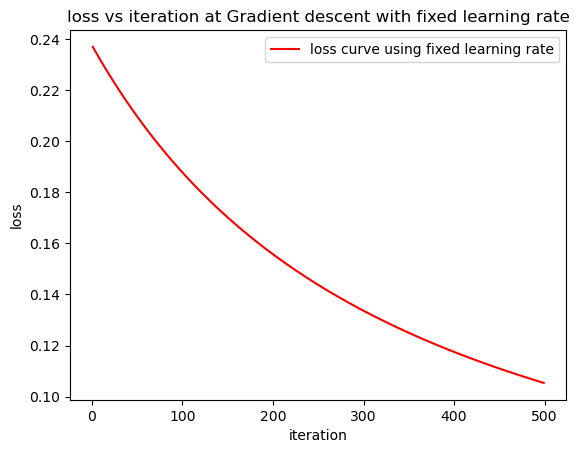

In [90]:
n_iteration1, c1 = np.shape(f1)  # array of costs at each iteration in gradient descent method with fixed learning rate.
n_iteration1 = list(range(1, n_iteration1+1))
n_iteration1 = np.array(n_iteration1).reshape((len(n_iteration1), 1))

plt.plot(n_iteration1, f1, color = 'red', label = 'loss curve using fixed learning rate')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('loss vs iteration at Gradient descent with fixed learning rate')
plt.legend()
plt.show()

In [74]:
w2, f2 = Gradient_descent_alpha(X, y)  # calling gradient descent method  with unidirectional algorithm.


At 1-th interation, the value of W is [1. 1. 1.]
At 2-th interation, the value of W is [0.36286072 1.76524322 1.75922991]
At 3-th interation, the value of W is [0.27333534 1.97141365 1.96286747]
At 4-th interation, the value of W is [0.2232525  2.12340209 2.11258826]
At 5-th interation, the value of W is [0.1912057  2.24621923 2.23318928]
At 6-th interation, the value of W is [0.16922415 2.35027549 2.3350176 ]
At 7-th interation, the value of W is [0.15350814 2.44107439 2.42355642]
At 8-th interation, the value of W is [0.14197864 2.52193068 2.50211536]
At 9-th interation, the value of W is [0.13339042 2.59501552 2.57286626]
At 10-th interation, the value of W is [0.12694775 2.66183738 2.63732055]
At 11-th interation, the value of W is [0.12211669 2.72349146 2.69657709]
At 12-th interation, the value of W is [0.11852487 2.78080051 2.7514624 ]
At 13-th interation, the value of W is [0.11590441 2.83439972 2.8026153 ]
At 14-th interation, the value of W is [0.11405759 2.88479064 2.8505406

In [84]:
print(f'The optimal weight evaluated by gradient descent method using unidirectional algorithm is :')
print(w2)

optimal_loss1 = cost_function(w2, X, y)
print(f'The optimal loss at full gradient descent method using unidirectional algorithm is : {optimal_loss1}')

The optimal weight evaluated by gradient descent method using unidirectional algorithm is :
[0.6225118  6.59404387 5.96071284]
The optimal loss at full gradient descent method using unidirectional algorithm is : 0.002803281673081913


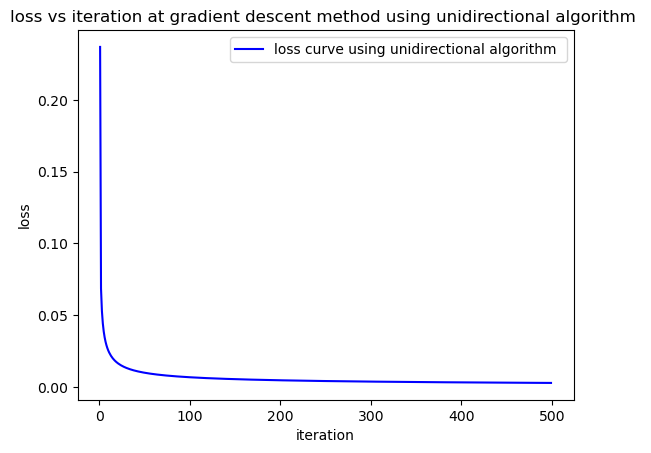

In [88]:
n_iteration2, c2 = np.shape(f2)  # array of costs at each iteration in gradient descent method using unidirectional algorithm.
n_iteration2 = list(range(1, n_iteration2+1))
n_iteration2 = np.array(n_iteration2).reshape((len(n_iteration2), 1))

plt.plot(n_iteration2, f2, color = 'blue', label = 'loss curve using unidirectional algorithm ')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('loss vs iteration at gradient descent method using unidirectional algorithm ')
plt.legend()
plt.show()

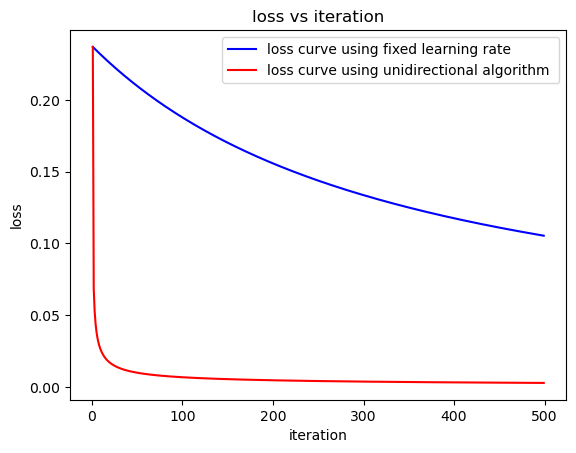

In [87]:
plt.plot(n_iteration1, f1, color = 'blue', label = 'loss curve using fixed learning rate')
plt.plot(n_iteration2, f2, color = 'red', label = 'loss curve using unidirectional algorithm ')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('loss vs iteration')
plt.legend()
plt.show()

In [93]:
compare(w1, w2, X, y)  # calling the compare function which will give the number of misclassified days.



The no. of misclassified days by gradient descent method with fixed learning rate is: 0
The no. of misclassified days by gradient descent method using unidirectional algorithm is: 0
    Ground Truth  GD_fi_al prob.  prediction  GD_uni Prob.  prediction
0              1        0.995183           1  1.000000e+00           1
1              1        0.949715           1  9.999620e-01           1
2              1        0.960779           1  9.999879e-01           1
3              0        0.144453           0  6.902027e-05           0
4              1        0.985016           1  9.999998e-01           1
5              1        0.972404           1  9.999970e-01           1
6              0        0.115421           0  2.227840e-05           0
7              0        0.242542           0  8.870550e-04           0
8              0        0.199284           0  2.876851e-04           0
9              1        0.954253           1  9.999809e-01           1
10             0        0.109008     

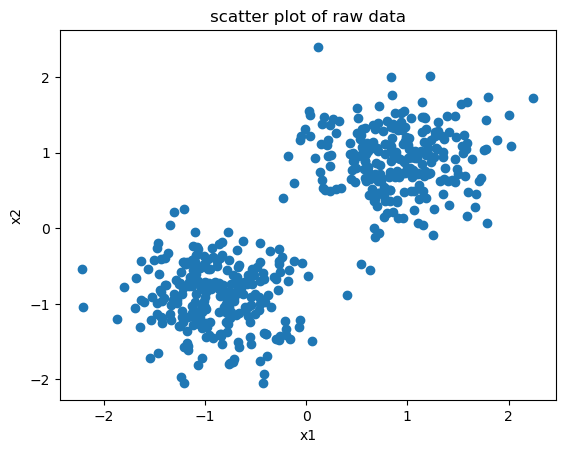

In [95]:

plt.scatter(X[:, 1], X[:, 2])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('scatter plot of raw data')
plt.show()

-------: Decision boundary by Gradient descent method with learing rate :-----------


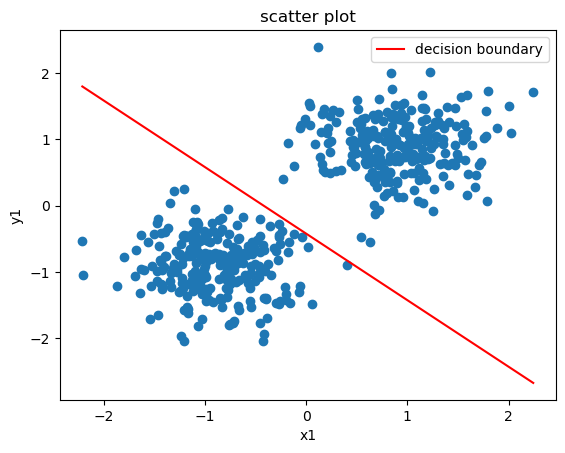

In [98]:
print('-------: Decision boundary by Gradient descent method with learing rate :-----------')

decision_boundary(w1, X)


-----: Decision boundary by Gradient descent method where learing rate is computed by unidirectional method :---------


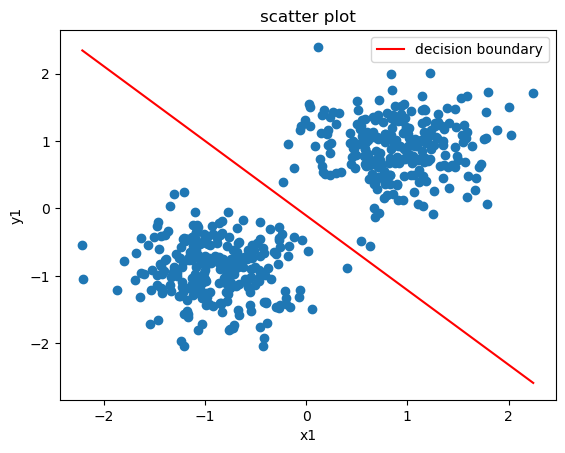

In [99]:
print('-----: Decision boundary by Gradient descent method where learing rate is computed by unidirectional method :---------')

decision_boundary(w2, X)
